<a href="https://colab.research.google.com/github/vipervit/montyhall/blob/main/montyhall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import logging
from enum import Enum, IntEnum

logger = logging.getLogger(__name__)
console = logging.StreamHandler()
logger.addHandler(console)
logger.setLevel(logging.INFO)

class original(IntEnum):
    total = 3
    prized = 1
    toguess = 1
    toopen = 1

class prize(Enum):
    win = 'CAR!'
    bust = 'GOAT'

class params:
    total = original.total
    prized = original.prized
    guess = original.toguess
    open = original.toopen
    always_switch = False
    plays = 10000

In [28]:
class door:

    def __init__(self):
        self._id = None
        self._hides = prize.bust
        self._isOpen = False
        self._isGuessed = False

    @property
    def id(self):
        return self._id

    @id.setter
    def id(self, val):
        self._id = val

    @property
    def hides(self):
        return self._hides

    @hides.setter
    def hides(self, val):
        self._hides = val

    @property
    def is_open(self):
        return self._isOpen

    @is_open.setter
    def is_open(self, val):
        self._isOpen = val

    @property
    def is_guessed(self):
        return self._isGuessed

    @is_guessed.setter
    def is_guessed(self, val):
        self._isGuessed = val

    def hasPrize(self):
        if self._hides == prize.win:
            return True
        else:
            return False


In [29]:
class doors:

    def __init__(self):
        self._list = []
        self._total = original.total
        self._prized = original.prized

    @property
    def total(self):
        return self._total

    @total.setter
    def total(self, val):
        self._total = val

    @property
    def prized(self):
        return self._prized

    @prized.setter
    def prized(self, val):
        self._prized = val

    def __open__(self, to_open):
        counter = 0
        while counter < to_open:
            door = random.choice(self._list)
            if not door.is_open and not door.hasPrize() and not door.is_guessed:
                door.is_open = True
                counter += 1

    def __setup__(self):
        for i in range(self._total):
            dr = door()
            dr.id = i
            self._list.append(dr)
        self.__set_prized__()

    def __set_prized__(self):
        counter = 0
        while counter < self._prized:
            door = random.choice(self._list)
            if not door.hasPrize():
                door.hides = prize.win
                counter += 1
        logger.debug(__name__ + '.__set_prized__: ' + str(self.__get_all_prized__()))

    def __get_all_prized__(self):
        return [door.id for door in self._list if door.hasPrize()]

    def __get_all_guessed_correctly__(self):
        return [door.id for door in self.__objlist__() if door.is_guessed and door.hasPrize()]

    def __get_all_not_guessed_correctly__(self):
        return [door.id for door in self.__objlist__() if door.is_guessed and not door.hasPrize()]

    def __set_guessed__(self, idlist):
        self.__reset_guessed__()
        for id in idlist:
            self._list[id].is_guessed = True
        logger.debug(__name__ + '__set_guessed__: ' + str(self.get_all_guessed()))
        logger.debug(__name__ + '__set_guessed__: winning guesses' + str(self.__get_all_guessed_correctly__()))
        logger.debug(__name__ + '__set_guessed__: losing guesses' + str(self.__get_all_not_guessed_correctly__()))

    def __reset_guessed__(self):
        for each in self._list:
            each.is_guessed = False

    def __objlist__(self):
        return self._list

    def get_random_guessed(self):
        while True:
            door = random.choice(self._list)
            if door.is_guessed:
                return door.id

    def get_all(self):
        return [door.id for door in self._list]

    def get_all_guessed(self):
        return [door.id for door in self._list if door.is_guessed]

    def get_all_not_guessed(self):
        return [door.id for door in self._list if not door.is_guessed]

    def get_all_switchable(self):
        switchable = [door.id for door in self._list if not door.is_open and not door.is_guessed]
        logger.debug(__name__ + '.get_all_switchable ' + str(switchable))
        return switchable

    def total_count(self):
        return len(self._list)

    def prized_count(self):
        return len([door for door in self._list if door.hasPrize()])

    def opened_count(self):
        return len([door for door in self._list if door.is_open])

    def guessed_count(self):
        return len([door for door in self._list if door.is_guessed])


In [30]:
class host:

    def __init__(self):
        self._toopen = None
        self.doors = doors()

    @property
    def total_doors_to_open(self):
        return self._toopen

    @total_doors_to_open.setter
    def total_doors_to_open(self, val):
        self._toopen = val

    def setup_doors(self):
        self.doors.__setup__()

    def open_doors(self):
        self.doors.__open__(self._toopen)

    def accept_guesses(self, guesses):
        self.doors.__set_guessed__(guesses)

    def won_guesses_count(self):
        count = len(self.doors.__get_all_guessed_correctly__())
        logger.debug(__name__ + '.won_guesses_count: ' + str(count))
        return count

    def lost_guesses_count(self):
        count = len(self.doors.__get_all_not_guessed_correctly__())
        logger.debug(__name__ + '.lost_guesses_count: ' + str(count))
        return count

    def win_rate(self):
        return self.won_guesses_count() / self.doors.prized_count()

    def loss_rate(self):
        return self.lost_guesses_count() / self.doors.prized_count()


In [31]:
class player:

    def __init__(self):
        self._toguess = original.toguess
        self._guessrandomly = True
        self._guesslist = []
        self._doorlist = None

    @property
    def total_doors_to_guess(self):
        return self._toguess

    @total_doors_to_guess.setter
    def total_doors_to_guess(self, val):
        self._toguess = val

    @property
    def guess_randomly(self):
        return self._guessrandomly

    @guess_randomly.setter
    def guess_randomly(self, val):
        self._guessrandomly = val

    @property
    def guesses(self):
        self._guesslist.sort()
        return self._guesslist

    @guesses.setter
    def guesses(self, val):
        if not self._guessrandomly:
            self._guesslist = val
        else:
            raise 'Unable to assign guesses: random guesses mode is set to True. '

    @property
    def doorlist(self):
        return self._doorlist

    @doorlist.setter
    def doorlist(self, val):
        self._doorlist = val

    def __reset_guesses__(self):
        self._guesslist.clear()

    def make_guesses(self):
        counter = 0
        self.__reset_guesses__()
        if self.guess_randomly:
            while counter < self.total_doors_to_guess:
                choice = random.choice(self.doorlist)
                if not choice in self.guesses:
                    self.guesses.append(choice)
                    counter += 1
        logger.debug(__name__ + '.make_guesses: ' + str(self.guesses))


In [32]:
import sys
import logging
import getopt
import random
from enum import IntEnum
import matplotlib.pyplot as plt
import numpy as np

In [33]:
# params.plays=100000
# params.total=10
# params.open=2
# params.guess=1
# params.prized=2

In [34]:
def init_data_containers(n):
    dict = {}
    for i in range(n):
        dict[i] = 0
    return dict

In [35]:
def execute(params):
    wins = init_data_containers(params.plays)
    losses = init_data_containers(params.plays)
    for i in range(params.plays):
        hst = host()
        plyr = player()
        hst.doors.total = params.total
        hst.doors.prized = params.prized
        hst.total_doors_to_open = params.open
        hst.setup_doors()
        plyr.doorlist = hst.doors.get_all()
        plyr.total_doors_to_guess = params.guess
        plyr.make_guesses()
        guesses = plyr.guesses
        hst.accept_guesses(guesses)
        hst.open_doors()
        if params.always_switch:
            plyr.doorlist = hst.doors.get_all_switchable()
            plyr.make_guesses()
            new_guesses = plyr.guesses
            hst.accept_guesses(new_guesses)
        wins[i] += hst.won_guesses_count()
        losses[i] += hst.lost_guesses_count()
    return {'always switch': params.always_switch, 'wins': sum(wins.values()), 'losses': sum(losses.values()) }

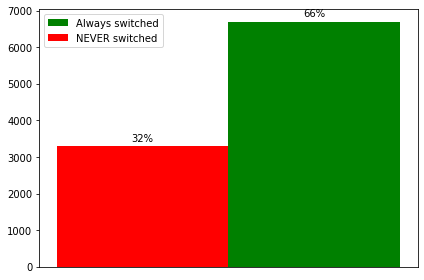

In [36]:
def autolabel(rects, denom):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(int(100*height/denom)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# labels = ['Always switched doors', 'Did NOT switch doors']
# x=np.arange(len(labels))
# x=np.arange(1)
width=0.1

res=[execute(params)['wins'] for params.always_switch in [True, False]]

fig, ax = plt.subplots()
yep=ax.bar(1+width/2, res[0], width, label='Always switched', color='green')
nope=ax.bar(1-width/2, res[1], width, label='NEVER switched', color='red')

autolabel(yep, params.plays)
autolabel(nope, params.plays)

ax.set_xticks([])
# ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()
plt.show()
